## Extract the Data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install prophet
from prophet import Prophet





In [74]:
# Code to extract Bitcoin prices data
# Example: pd.read_csv('path_to_bitcoin_prices_data.csv')

bitcoin_prices_10_18= pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv')
display(bitcoin_prices_10_18.head())
display(bitcoin_prices_10_18.tail())

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
2901,1/27/2018,11524.77667,16830312.5,1.940000e+11,7.630946e+08,153844.0759,1.038548,0,1232.980892,11.600,...,1.778601,126.855696,541699,193578,295802277,188058,126082,1363301.068,119799.4611,1.380662e+09
2902,1/28/2018,11765.71000,16832287.5,1.980000e+11,7.381042e+08,154006.9753,1.031009,0,1350.924051,11.950,...,1.302242,117.430262,492738,213446,296015723,205967,137919,3128906.096,163590.5694,1.924759e+09
2903,1/29/2018,11212.65500,16834137.5,1.890000e+11,6.111197e+08,154157.6651,1.018174,0,1568.756757,12.275,...,1.243012,96.382352,532630,232176,296247899,225983,155772,1941048.853,160557.7065,1.800278e+09
2904,1/30/2018,10184.06167,16836225.0,1.710000e+11,1.266284e+09,154322.5790,0.987509,0,1416.820359,11.075,...,1.301143,96.749249,531440,236609,296484508,230310,158259,2359671.266,172755.8071,1.759356e+09
2905,1/31/2018,10125.01333,16837687.5,1.700000e+11,9.332398e+08,154444.5903,1.042831,0,1745.948718,15.675,...,1.016284,80.529148,481100,204276,296688784,197264,141543,1785708.486,159867.3306,1.618659e+09


In [75]:
# Read the CSV file
bitcoin_prices_17_21 = pd.read_csv('Resources/bitcoin_hourly.csv')

# Display the first few rows of the DataFrame
display(bitcoin_prices_17_21.head())
display(bitcoin_prices_17_21.tail())


,date,close,volume
0,2017-08-17 05:00:00.000,4315.32,23.234916
1,2017-08-17 06:00:00.000,4324.35,7.229691
2,2017-08-17 07:00:00.000,4349.99,4.443249
3,2017-08-17 08:00:00.000,4360.69,0.972807
4,2017-08-17 09:00:00.000,4444.00,10.763623


,date,close,volume
30743,2021-02-12 01:00:00.000,48477.50,2957.115927
30744,2021-02-12 02:00:00.000,47935.66,3206.021413
30745,2021-02-12 03:00:00.000,47587.31,2471.162463
30746,2021-02-12 04:00:00.000,47271.55,4724.621511
30747,2021-02-12 05:00:00.000,47398.79,2979.284188


In [76]:
# Read the CSV file
bitcoin_prices_22_24 = pd.read_csv('Resources/BTC-USD.csv')

# Display the first few rows of the DataFrame
display(bitcoin_prices_22_24.head())
display(bitcoin_prices_22_24.tail())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-24,16796.976563,16864.703125,16793.527344,16847.755859,16847.755859,9744636213
1,2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938
2,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804
3,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
4,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920


,Date,Open,High,Low,Close,Adj Close,Volume
360,2023-12-19,42641.511719,43354.296875,41826.335938,42270.527344,42270.527344,23171001281
361,2023-12-20,42261.300781,44275.585938,42223.816406,43652.250000,43652.250000,27868908174
362,2023-12-21,43648.125000,44240.667969,43330.050781,43869.152344,43869.152344,22452766169
363,2023-12-22,43868.988281,44367.957031,43441.968750,43997.902344,43997.902344,21028503216
364,2023-12-23,44012.199219,44014.253906,43404.902344,43798.250000,43798.250000,13486615552


## Visualize the Data

In [117]:
bitcoin_prices_10_18.rename(columns={'btc_market_price': 'Price'}, inplace=True)
bitcoin_prices_10_18.head()

,Date,Price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [88]:
bitcoin_prices_17_21.rename(columns={'close': 'Price'}, inplace=True)
bitcoin_prices_17_21.rename(columns={'date': 'Date'}, inplace=True)
bitcoin_prices_17_21.head(20)

,Date,Price,volume
0,2017-08-17 05:00:00.000,4315.32,23.234916
1,2017-08-17 06:00:00.000,4324.35,7.229691
2,2017-08-17 07:00:00.000,4349.99,4.443249
3,2017-08-17 08:00:00.000,4360.69,0.972807
4,2017-08-17 09:00:00.000,4444.00,10.763623
5,2017-08-17 10:00:00.000,4460.00,24.865399
6,2017-08-17 11:00:00.000,4427.30,27.018053
7,2017-08-17 12:00:00.000,4411.00,23.032398
8,2017-08-17 13:00:00.000,4459.00,31.312436
9,2017-08-17 14:00:00.000,4470.82,51.735897


In [89]:
#Convert the 2017-2021 data to datetime daily data only taking the daily records at the 00:00:00.000 timestamp
bitcoin_prices_17_21['Date'] = pd.to_datetime(bitcoin_prices_17_21['Date'])
bitcoin_prices_17_21['Date'] = bitcoin_prices_17_21['Date'].dt.date
bitcoin_prices_17_21 = bitcoin_prices_17_21.groupby('Date').first().reset_index()
bitcoin_prices_17_21.head()

,Date,Price,volume
0,2017-08-17,4315.32,23.234916
1,2017-08-18,4286.53,82.435474
2,2017-08-19,4163.49,41.308877
3,2017-08-20,4086.09,2.343924
4,2017-08-21,4108.28,53.091325


In [90]:
# 22 to 24 data
bitcoin_prices_22_24.rename(columns={'Close': 'Price'}, inplace=True)
bitcoin_prices_22_24.head()

,Date,Open,High,Low,Price,Adj Close,Volume
0,2022-12-24,16796.976563,16864.703125,16793.527344,16847.755859,16847.755859,9744636213
1,2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938
2,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804
3,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
4,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920


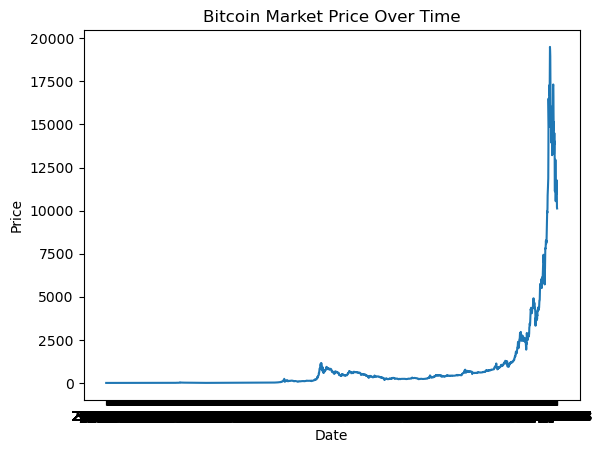

In [91]:
plt.plot(bitcoin_prices_10_18['Date'], bitcoin_prices_10_18['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Market Price Over Time')
plt.show()

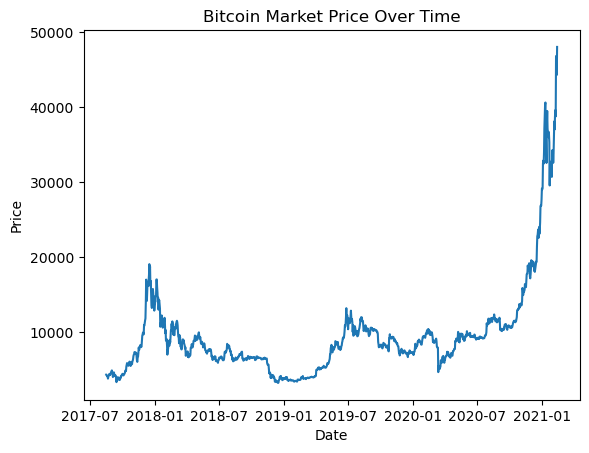

In [93]:
plt.plot(bitcoin_prices_17_21['Date'], bitcoin_prices_17_21['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Market Price Over Time')
plt.show()

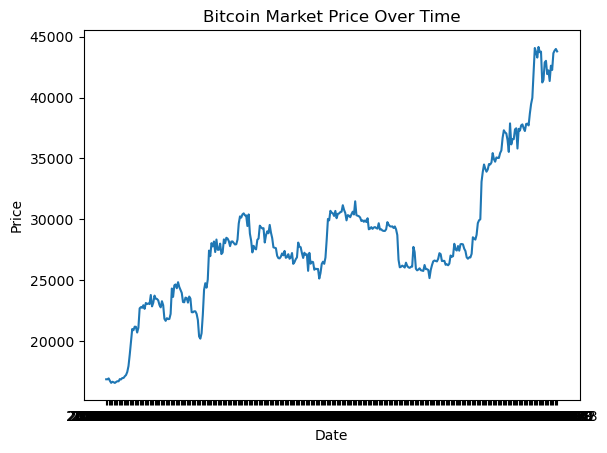

In [94]:
plt.plot(bitcoin_prices_22_24['Date'], bitcoin_prices_22_24['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Market Price Over Time')
plt.show()


## Cleanse 2010 to 2024 Data for Prophet

In [123]:
# Creating a copy of the DataFrame for Prophet
bitcoin_prices_10_18_prophet = bitcoin_prices_10_18[['Date', 'Price']].copy()
bitcoin_prices_10_18_prophet.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Convert 'ds' column in the prophet DataFrame to datetime
bitcoin_prices_10_18_prophet['ds'] = pd.to_datetime(bitcoin_prices_10_18_prophet['ds'], errors='coerce')

# Drop rows with NaT in 'ds' column
bitcoin_prices_10_18_prophet.dropna(subset=['ds'], inplace=True)

# Set 'ds' as the index and resample
bitcoin_prices_10_18_prophet.set_index('ds', inplace=True)
bitcoin_prices_10_18_quarterly = bitcoin_prices_10_18_prophet.resample('Q').last()

# Displaying the head, tail, and dtypes
display(bitcoin_prices_10_18_quarterly.head())
display(bitcoin_prices_10_18_quarterly.tail())
display(bitcoin_prices_10_18_quarterly.dtypes)



,y
ds,
2010-03-31,0.000000
2010-06-30,0.000000
2010-09-30,0.061920
2010-12-31,0.299999
2011-03-31,0.800980


,y
ds,
2017-03-31,1079.549314
2017-06-30,2477.641375
2017-09-30,4335.368317
2017-12-31,14165.575000
2018-03-31,10125.013330


y    float64
dtype: object

In [124]:
# Creating a copy of the DataFrame for Prophet
bitcoin_prices_17_21_prophet = bitcoin_prices_17_21[['Date', 'Price']].copy()
bitcoin_prices_17_21_prophet.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Convert 'ds' column in the prophet DataFrame to datetime
bitcoin_prices_17_21_prophet['ds'] = pd.to_datetime(bitcoin_prices_17_21_prophet['ds'], errors='coerce')

# Drop rows with NaT in 'ds' column
bitcoin_prices_17_21_prophet.dropna(subset=['ds'], inplace=True)

# Set 'ds' as the index and resample
bitcoin_prices_17_21_prophet.set_index('ds', inplace=True)
bitcoin_prices_17_21_quarterly = bitcoin_prices_17_21_prophet.resample('Q').last()

# Displaying the head, tail, and dtypes
display(bitcoin_prices_17_21_quarterly.head())
display(bitcoin_prices_17_21_quarterly.tail())
display(bitcoin_prices_17_21_quarterly.dtypes)

,y
ds,
2017-09-30,4169.91
2017-12-31,12850.00
2018-03-31,6995.00
2018-06-30,6238.99
2018-09-30,6577.30


,y
ds,
2020-03-31,6439.55
2020-06-30,9174.53
2020-09-30,10809.17
2020-12-31,29120.51
2021-03-31,47990.00


y    float64
dtype: object

In [126]:
# Creating a copy of the DataFrame for Prophet
bitcoin_prices_22_24_prophet = bitcoin_prices_22_24[['Date', 'Price']].copy()
bitcoin_prices_22_24_prophet.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Convert 'ds' column in the prophet DataFrame to datetime
bitcoin_prices_22_24_prophet['ds'] = pd.to_datetime(bitcoin_prices_22_24_prophet['ds'], errors='coerce')

# Drop rows with NaT in 'ds' column
bitcoin_prices_22_24_prophet.dropna(subset=['ds'], inplace=True)

# Set 'ds' as the index and resample
bitcoin_prices_22_24_prophet.set_index('ds', inplace=True)
bitcoin_prices_22_24_quarterly = bitcoin_prices_22_24_prophet.resample('Q').last()

# Displaying the head, tail, and dtypes
display(bitcoin_prices_22_24_quarterly.head())
display(bitcoin_prices_22_24_quarterly.tail())
display(bitcoin_prices_22_24_quarterly.dtypes)

,y
ds,
2022-12-31,16547.496094
2023-03-31,28478.484375
2023-06-30,30477.251953
2023-09-30,26967.916016
2023-12-31,43798.250000


,y
ds,
2022-12-31,16547.496094
2023-03-31,28478.484375
2023-06-30,30477.251953
2023-09-30,26967.916016
2023-12-31,43798.250000


y    float64
dtype: object

In [127]:
# Join the three datasets into one that only conatins the columns 'ds' and 'y' avoid creating duplicate rows
# Example: bitcoin_prices_df_prophet = pd.concat([bitcoin_prices_df_prophet_1, bitcoin_prices_df_prophet_2, bitcoin_prices_df_prophet_3])
bitcoin_prices_prophet_quarterly = pd.concat([bitcoin_prices_10_18_quarterly, bitcoin_prices_17_21_quarterly, bitcoin_prices_22_24_quarterly])
display (bitcoin_prices_prophet_quarterly.head())
display (bitcoin_prices_prophet_quarterly.tail())
display (bitcoin_prices_prophet_quarterly.dtypes)



,y
ds,
2010-03-31,0.000000
2010-06-30,0.000000
2010-09-30,0.061920
2010-12-31,0.299999
2011-03-31,0.800980


,y
ds,
2022-12-31,16547.496094
2023-03-31,28478.484375
2023-06-30,30477.251953
2023-09-30,26967.916016
2023-12-31,43798.250000


y    float64
dtype: object

## Visualizations and Predictions with Prophet

In [129]:
# Reset the index so 'ds' becomes a column
bitcoin_prices_prophet_quarterly_reset = bitcoin_prices_prophet_quarterly.reset_index()

# Fit the model with Prophet
model = Prophet()
model.fit(bitcoin_prices_prophet_quarterly_reset)






22:41:45 - cmdstanpy - INFO - Chain [1] start processing
22:41:45 - cmdstanpy - INFO - Chain [1] done processing


In [130]:
# Create a future DataFrame for the next N periods (e.g., 8 quarters)
future = model.make_future_dataframe(periods=8, freq='Q')

# Display the future DataFrame
display(future.tail())


,ds
53,2024-12-31
54,2025-03-31
55,2025-06-30
56,2025-09-30
57,2025-12-31


In [131]:
# Predict future values
forecast = model.predict(future)

# Display the forecast
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


,ds,yhat,yhat_lower,yhat_upper
53,2024-12-31,26887.909292,17610.680459,36089.938575
54,2025-03-31,26970.247953,18080.490239,36218.866857
55,2025-06-30,24381.990543,15095.350369,33281.521552
56,2025-09-30,24469.778373,16151.767841,33626.358843
57,2025-12-31,28623.621329,19771.748693,37757.008422


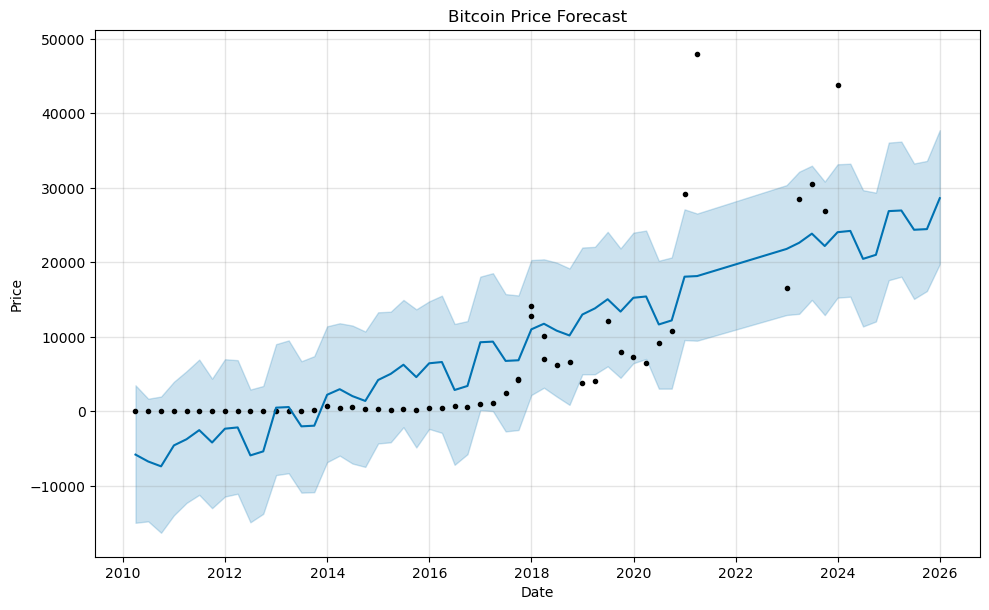

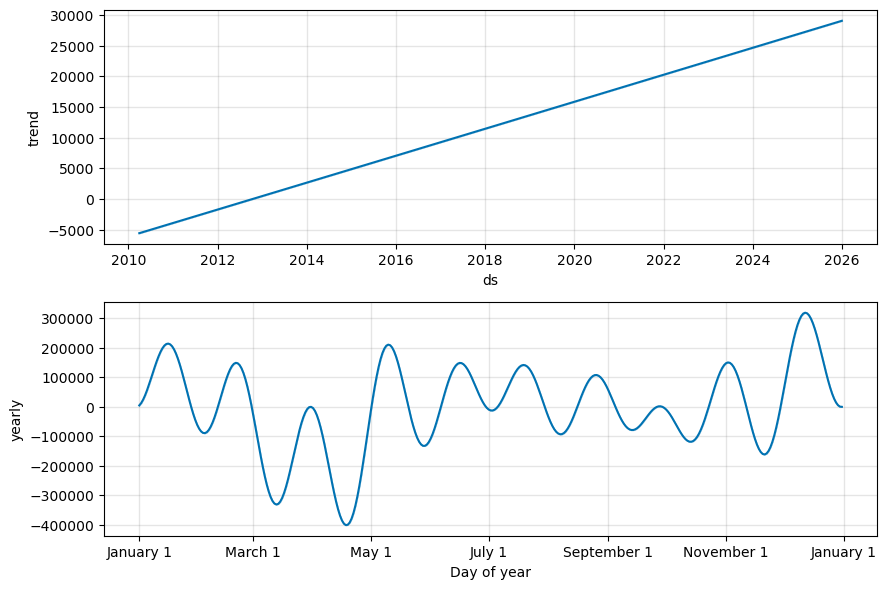

In [132]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Bitcoin Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


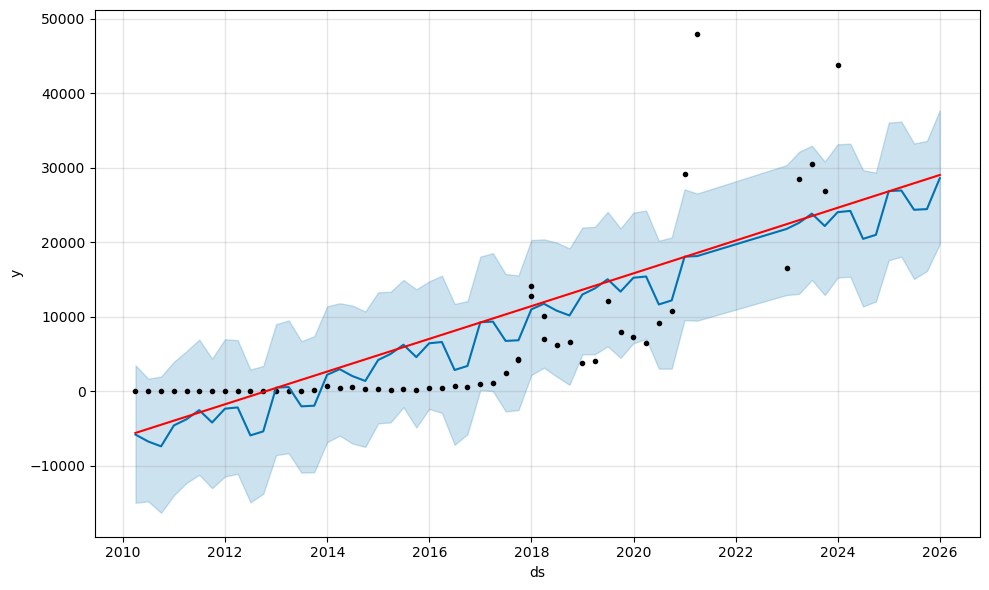

In [133]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)


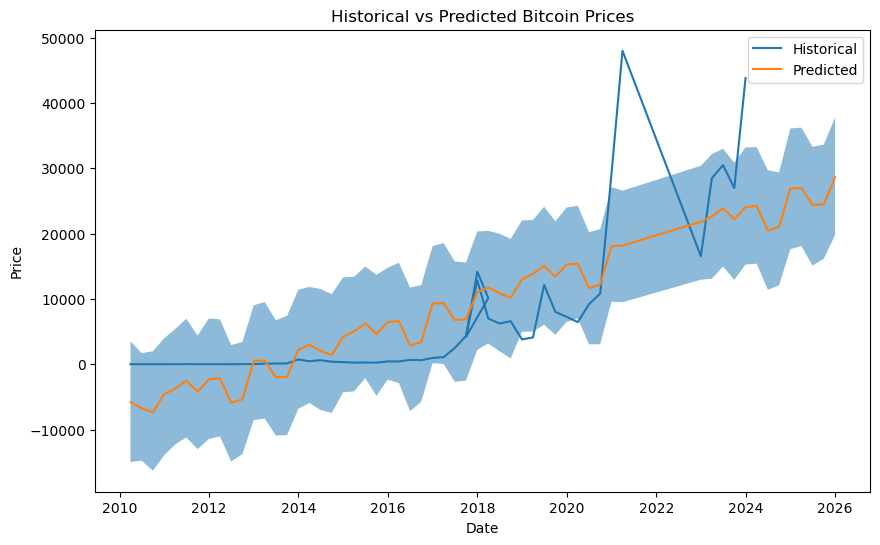

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_prices_prophet_quarterly.index, bitcoin_prices_prophet_quarterly['y'], label='Historical')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.5)
plt.title("Historical vs Predicted Bitcoin Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


# Fixing overlapping of data found in 2017-2018 as shown in the above graph

In [135]:
# Assuming you have three DataFrames: df1, df2, df3
print("Dataset 1 Date Range:", bitcoin_prices_10_18_quarterly.index.min(), "-", bitcoin_prices_10_18_quarterly.index.max())
print("Dataset 2 Date Range:", bitcoin_prices_17_21_quarterly.index.min(), "-", bitcoin_prices_17_21_quarterly.index.max())
print("Dataset 3 Date Range:", bitcoin_prices_22_24_quarterly.index.min(), "-", bitcoin_prices_22_24_quarterly.index.max())


Dataset 1 Date Range: 2010-03-31 00:00:00 - 2018-03-31 00:00:00
Dataset 2 Date Range: 2017-09-30 00:00:00 - 2021-03-31 00:00:00
Dataset 3 Date Range: 2022-12-31 00:00:00 - 2023-12-31 00:00:00


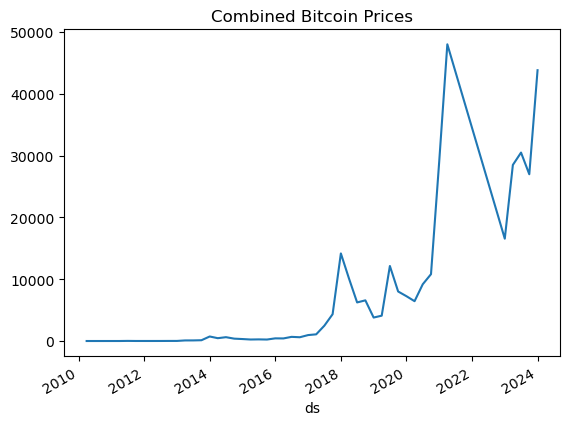

In [136]:
# Trim Dataset 2 to start from 2018-06-30
bitcoin_prices_17_21_quarterly_trimmed = bitcoin_prices_17_21_quarterly[bitcoin_prices_17_21_quarterly.index > '2018-03-31']

# Concatenate the datasets without overlap
bitcoin_prices_prophet_quarterly = pd.concat([
    bitcoin_prices_10_18_quarterly,
    bitcoin_prices_17_21_quarterly_trimmed,
    bitcoin_prices_22_24_quarterly
]).sort_index()

# Verify that there are no duplicate dates
assert bitcoin_prices_prophet_quarterly.index.is_unique

# Plot the combined series to visually inspect for continuity
bitcoin_prices_prophet_quarterly['y'].plot(title='Combined Bitcoin Prices')
plt.show()


In [137]:
# Export the cleansed dataset to CSV called cleansed_bitcoin_prices.csv
bitcoin_prices_prophet_quarterly.to_csv('cleansed_bitcoin_prices.csv')